# Задание 1 (6 баллов)

В данном задании мы будем работать со [списком 250 лучших фильмов IMDb](https://www.imdb.com/chart/top/?ref_=nv_mp_mv250)

1. Выведите топ-4 *фильма* **по количеству оценок пользователей** и **количество этих оценок** (1 балл)
2. Выведите топ-4 лучших *года* (**по среднему рейтингу фильмов в этом году**) и **средний рейтинг** (1 балл)
3. Постройте отсортированный **barplot**, где показано **количество фильмов** из списка **для каждого режисёра** (только для режиссёров с более чем 2 фильмами в списке) (1 балл)
4. Выведите топ-4 самых популярных *режиссёра* (**по общему числу людей оценивших их фильмы**) (2 балла)
5. Сохраните данные по всем 250 фильмам в виде таблицы с колонками (name, rank, year, rating, n_reviews, director) в любом формате (2 балла)

Использовать можно что-угодно, но полученные данные должны быть +- актуальными на момент сдачи задания

In [1]:
import requests
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.imdb.com/chart/top/'
params = {
    "sort": "nv,desc", 
    'mode': 'simple',
    'page': '1'
    }
response = requests.get(url, params=params)
soup = BeautifulSoup(response.content, "lxml")

In [3]:
# 1. Выведите топ-4 фильма по количеству оценок пользователей и количество этих оценок (1 балл)

n_films = 4
for film in range(n_films):
    cinema = soup.find_all('img')[film].attrs['alt']
    score_ = soup.find_all('strong')[film].attrs['title']
    users = re.search(r'\d[\d,]*', score_[3:]).group(0)
    print(f'{film+1}. Фильм: {cinema}, Количество оценок: {users}')

1. Фильм: Побег из Шоушенка, Количество оценок: 2,733,291
2. Фильм: Темный рыцарь, Количество оценок: 2,706,418
3. Фильм: Начало, Количество оценок: 2,402,315
4. Фильм: Бойцовский клуб, Количество оценок: 2,176,067


In [4]:
# 2. Выведите топ-4 лучших года (по среднему рейтингу фильмов в этом году) и средний рейтинг (1 балл)

years = dict()
for film in range(250):
    year = soup.find_all(class_='secondaryInfo')[film].text[1:5]
    score_ = soup.find_all('strong')[film].attrs['title']
    score = re.search(r'\d[\d.]*', score_).group(0)
    years[year] = years.setdefault(year, np.array([0, 0, 0])) + np.array([float(score), 1, 0])
    years[year][2] = years[year][0] / years[year][1]

years = dict(sorted(years.items(), key=lambda x: x[1][2], reverse=True))
for i, (key, value) in zip(range(4), years.items()):
    print(f'{i+1}. Год: {key}, Оценка: {value[2]}')

1. Год: 1972, Оценка: 9.2
2. Год: 1994, Оценка: 8.76
3. Год: 1991, Оценка: 8.55
4. Год: 1974, Оценка: 8.55


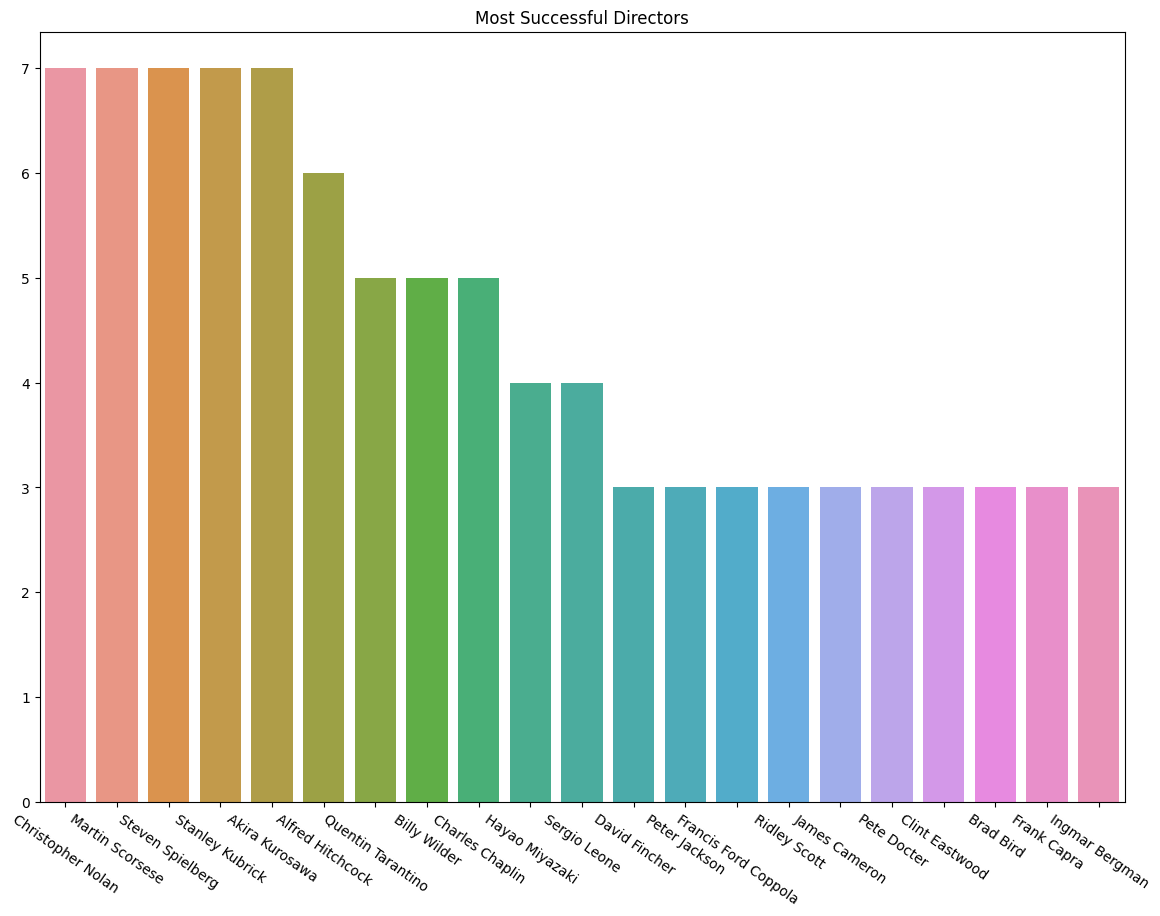

In [5]:
# 3. Постройте отсортированный barplot, где показано количество фильмов из списка 
#    для каждого режисёра (только для режиссёров с более чем 2 фильмами в списке) (1 балл)

directors = dict()
for film in range(250):
    director_at_all = soup.find_all(class_='titleColumn')[film].find('a').attrs['title']
    director = re.search(r'^(.*?)\s\(dir\.\)', director_at_all).group(1)
    directors[director] = directors.setdefault(director, 0) + 1
directors = dict(sorted(directors.items(), key=lambda item: item[1], reverse=True))
directors = {key: value for key, value in directors.items() if value > 2}

fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x=list(directors.keys()), y=list(directors.values()), ax=ax)
ax.set_title('Most Successful Directors')
ax.set_xticklabels(list(directors.keys()), rotation=-35, fontsize=10)

plt.show()

In [6]:
# 4. Выведите топ-4 самых популярных режиссёра (по общему числу людей оценивших их фильмы) (2 балла)

directors = dict()
for film in range(250):
    director_at_all = soup.find_all(class_='titleColumn')[film].find('a').attrs['title']
    director = re.search(r'^(.*?)\s\(dir\.\)', director_at_all).group(1)
    score_ = soup.find_all('strong')[film].attrs['title']
    users = re.search(r'\d[\d,]*', score_[3:]).group(0)
    users = int(users.replace(',', ''))
    directors[director] = directors.setdefault(director, 0) + users
directors = dict(sorted(directors.items(), key=lambda item: item[1], reverse=True))

for i, (key, value) in zip(range(4), directors.items()):
    print(f'{i+1}. Режиссер: {key}, Количество оценивших: {value}')

1. Режиссер: Christopher Nolan, Количество оценивших: 12856397
2. Режиссер: Quentin Tarantino, Количество оценивших: 7352826
3. Режиссер: Steven Spielberg, Количество оценивших: 7195557
4. Режиссер: Martin Scorsese, Количество оценивших: 7097743


In [19]:
# Сохраните данные по всем 250 фильмам в виде таблицы 
# с колонками (name, rank, year, rating, n_reviews, director) в любом формате (2 балла)

url = 'https://www.imdb.com/chart/top/'
params = {
    "sort": "rk,asc", 
    'mode': 'simple',
    'page': '1'
    }
response = requests.get(url, params=params)
soup = BeautifulSoup(response.content, "lxml")

name, rank, year, rating, n_reviews, director = [list() for _ in range(6)]

for film in range(25):
    name.append(soup.find_all('img')[film].attrs['alt'])
    rank_ = soup.find_all(class_='titleColumn')[film].text
    rank.append(re.search(r'^\s*(\d+)\.\s*', rank_).group(1))
    year.append(soup.find_all(class_='secondaryInfo')[film].text[1:5])
    rating_ = soup.find_all('strong')[film].attrs['title']
    rating.append(re.search(r'\d[\d.]*', rating_).group(0))
    n_reviews.append(re.search(r'\d[\d,]*', rating_[3:]).group(0))
    director_ = soup.find_all(class_='titleColumn')[film].find('a').attrs['title']
    director.append(re.search(r'^(.*?)\s\(dir\.\)', director_).group(1))

summar = pd.DataFrame({'name': name, 'rank': rank, 'year': year, 'rating': rating, 'n_reviews': n_reviews, 'director': director})
summar.to_csv('../Data/films_summary.csv', index=False)
summar

,name,rank,year,rating,n_reviews,director
0,Побег из Шоушенка,1,1994,9.2,"2,733,291",Frank Darabont
1,Крёстный отец,2,1972,9.2,"1,900,568",Francis Ford Coppola
2,Темный рыцарь,3,2008,9.0,"2,706,418",Christopher Nolan
3,Крёстный отец 2,4,1974,9.0,"1,295,761",Francis Ford Coppola
4,12 рaзгневанных мужчин,5,1957,9.0,"808,833",Sidney Lumet
5,Список Шиндлера,6,1993,8.9,"1,379,975",Steven Spielberg
6,Властелин колец: Возвращение короля,7,2003,8.9,"1,880,184",Peter Jackson
7,Криминальное чтиво,8,1994,8.8,"2,100,354",Quentin Tarantino
8,Властелин колец: Братство кольца,9,2001,8.8,"1,909,095",Peter Jackson
9,"Хороший, плохой, злой",10,1966,8.8,"774,584",Sergio Leone


# Задание 2 (10 баллов)

Напишите декоратор `telegram_logger`, который будет логировать запуски декорируемых функций и отправлять сообщения в телеграм.


Вся информация про API телеграм ботов есть в официальной документации, начать изучение можно с [этой страницы](https://core.telegram.org/bots#how-do-bots-work) (разделы "How Do Bots Work?" и "How Do I Create a Bot?"), далее идите в [API reference](https://core.telegram.org/bots/api)

**Основной функционал:**
1. Декоратор должен принимать **один обязательный аргумент** &mdash; ваш **CHAT_ID** в телеграме. Как узнать свой **CHAT_ID** можно найти в интернете
2. В сообщении об успешно завершённой функции должны быть указаны её **имя** и **время выполнения**
3. В сообщении о функции, завершившейся с исключением, должно быть указано **имя функции**, **тип** и **текст ошибки**
4. Ключевые элементы сообщения должны быть выделены **как код** (см. скриншот), форматирование остальных элементов по вашему желанию
5. Время выполнения менее 1 дня отображается как `HH:MM:SS.μμμμμμ`, время выполнения более 1 дня как `DDD days, HH:MM:SS`. Писать форматирование самим не нужно, всё уже где-то сделано за вас

**Дополнительный функционал:**
1. К сообщению также должен быть прикреплён **файл**, содержащий всё, что декорируемая функция записывала в `stdout` и `stderr` во время выполнения. Имя файла это имя декорируемой функции с расширением `.log` (**+3 дополнительных балла**)
2. Реализовать предыдущий пункт, не создавая файлов на диске (**+2 дополнительных балла**)
3. Если функция ничего не печатает в `stdout` и `stderr` &mdash; отправлять файл не нужно

**Важные примечания:**
1. Ни в коем случае не храните свой API токен в коде и не загружайте его ни в каком виде свой в репозиторий. Сохраните его в **переменной окружения** `TG_API_TOKEN`, тогда его можно будет получить из кода при помощи `os.getenv("TG_API_TOKEN")`. Ручное создание переменных окружения может быть не очень удобным, поэтому можете воспользоваться функцией `load_dotenv` из модуля [dotenv](https://pypi.org/project/python-dotenv/). В доке всё написано, но если коротко, то нужно создать файл `.env` в текущей папке и записать туда `TG_API_TOKEN=<your_token>`, тогда вызов `load_dotenv()` создаст переменные окружения из всех переменных в файле. Это довольно часто используемый способ хранения ключей и прочих приватных данных
2. Функцию `long_lasting_function` из примера по понятным причинам запускать не нужно. Достаточно просто убедится, что большие временные интервалы правильно форматируются при отправке сообщения (как в примерах)
3. Допустима реализация логирования, когда логгер полностью перехватывает запись в `stdout` и `stderr` (то есть при выполнении функций печать происходит **только** в файл)
4. В реальной жизни вам не нужно использовать Telegram API при помощи ручных запросов, вместо этого стоит всегда использовать специальные библиотеки Python, реализующие Telegram API, они более высокоуровневые и удобные. В данном задании мы просто учимся работать с API при помощи написания велосипеда.
5. Обязательно прочтите часть конспекта лекции про API перед выполнением задания, так как мы довольно поверхностно затронули это на лекции

**Рекомендуемые к использованию модули:**
1. os
2. sys
3. io
4. datetime
5. requests
6. dotenv

**Запрещённые модули**:
1. Любые библиотеки, реализующие Telegram API в Python (*python-telegram-bot, Telethon, pyrogram, aiogram, telebot* и так далле...)
2. Библиотеки, занимающиеся "перехватыванием" данных из `stdout` и `stderr` (*pytest-capturelog, contextlib, logging*  и так далле...)



Результат запуска кода ниже должен быть примерно такой:

![image.png](attachment:620850d6-6407-4e00-8e43-5f563803d7a5.png)

![image.png](attachment:65271777-1100-44a5-bdd2-bcd19a6f50a5.png)

![image.png](attachment:e423686d-5666-4d81-8890-41c3e7b53e43.png)

In [8]:
import sys
import time
import os
import requests
import tempfile
import shutil
import datetime
from dotenv import load_dotenv

In [9]:
load_dotenv()

True

In [10]:
TG_API_TOKEN = os.getenv("TG_API_TOKEN")
CHAT_ID = '836676585'

In [11]:
# Одновременно без создания дополнительных файлов и с сохранением порядка вывода данных из потоков, 
# как в исходной функции, сделать что-т никак не получается

def telegram_logger(chat_id):
    def decorator(func):
        def inner_func(*args, **kwargs):
            start = time.monotonic()
            
            with tempfile.NamedTemporaryFile(mode='w+', delete=True) as log:
                try:
                    sys.stdout = sys.stderr = log
                    result = func(*args, **kwargs)
                    status = "successfully finished"
                except Exception as exc:
                    result = None
                    status = f"failed with an exception: \n\n `{type(exc).__name__}: {str(exc)}`"
                    
                stop = time.monotonic()
                time_delta = datetime.datetime.fromtimestamp(stop) - datetime.datetime.fromtimestamp(start)
                if time_delta.days == 0:
                    time_range = time_delta
                else:
                    time_range = str(time_delta)
                    
                sys.stdout = sys.__stdout__
                sys.stderr = sys.__stderr__
                if status != "successfully finished":
                    message = f"🤡 Function `{func.__name__}` {status}\n"
                else:
                    message = f"🥳 Function `{func.__name__}` {status} in `{time_range}`\n"
                    
                log.flush()
                log = shutil.copy(log.name, f'{func.__name__}.log') 
                with open(log, "rb") as file:
                    requests.post(f"https://api.telegram.org/bot{TG_API_TOKEN}/sendDocument",
                                  params = {"chat_id": chat_id, "caption": message, 'parse_mode': "MarkdownV2"},
                                  files={"document": file})
            return result
        return inner_func
    return decorator



In [12]:
@telegram_logger(CHAT_ID)
def good_function():
    print("This goes to stdout")
    print("And this goes to stderr", file=sys.stderr)
    time.sleep(2)
    print("Wake up, Neo")

@telegram_logger(CHAT_ID)
def bad_function():
    print("Some text to stdout")
    time.sleep(2)
    print("Some text to stderr", file=sys.stderr)
    raise RuntimeError("Ooops, exception here!")
    print("This text follows exception and should not appear in logs")
    
@telegram_logger(CHAT_ID)
def long_lasting_function():
    time.sleep(200000000)


good_function()

try:
    bad_function()
except Exception:
    pass

# long_lasting_function()
# Протестируем перевод времени в нужный формат
time_delta = datetime.timedelta(days=2, hours=5)
time_str = str(time_delta)
print(time_str)

2 days, 5:00:00


# Задание 3

В данном задании от вас потребуется сделать Python API для какого-либо сервиса

В задании предложено два варианта: простой и сложный, **выберите только один** из них.

Можно использовать только **модули стандартной библиотеки** и **requests**. Любые другие модули можно по согласованию с преподавателем.

❗❗❗ В **данном задании** требуется оформить код в виде отдельного модуля (как будто вы пишете свою библиотеку). Код в ноутбуке проверяться не будет ❗❗❗

## Вариант 1 (простой, 10 баллов)

В данном задании вам потребуется сделать Python API для сервиса http://hollywood.mit.edu/GENSCAN.html

Он способен находить и вырезать интроны в переданной нуклеотидной последовательности. Делает он это не очень хорошо, но это лучше, чем ничего. К тому же у него действительно нет публичного API.

Реализуйте следующую функцию:
`run_genscan(sequence=None, sequence_file=None, organism="Vertebrate", exon_cutoff=1.00, sequence_name="")` &mdash; выполняет запрос аналогичный заполнению формы на сайте. Принимает на вход все параметры, которые можно указать на сайте (кроме Print options). `sequence` &mdash; последовательность в виде строки или любого удобного вам типа данных, `sequence_file` &mdash; путь к файлу с последовательностью, который может быть загружен и использован вместо `sequence`. Функция должна будет возвращать объект типа `GenscanOutput`. Про него дальше.

Реализуйте **датакласс** `GenscanOutput`, у него должны быть следующие поля:
+ `status` &mdash; статус запроса
+ `cds_list` &mdash; список предсказанных белковых последовательностей с учётом сплайсинга (в самом конце результатов с сайта)
+ `intron_list` &mdash; список найденных интронов. Один интрон можно представить любым типом данных, но он должен хранить информацию о его порядковом номере, его начале и конце. Информацию о интронах можно получить из первой таблицы в результатах на сайте.
+ `exon_list` &mdash; всё аналогично интронам, но только с экзонами.

По желанию можно добавить любые данные, которые вы найдёте в результатах

In [13]:
from run_genscan import run_genscan

In [14]:
# Для теста еще есть файл ../Data/FBN1.fna
result = run_genscan(sequence_file="../Data/HBB.fna", 
                organism="Vertebrate", exon_cutoff=0.5)

In [15]:
result.status

'200'

In [16]:
result.cds_list

['MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH']

In [17]:
result.intron_list

[['1.1', 'Intron', '+', 184, 313],
 ['1.2', 'Intron', '+', 537, 1386],
 ['1.3', 'Intron', '+', 1516, 1622]]

In [18]:
result.exon_list

[['1.01', 'Init', '+', 92, 183],
 ['1.02', 'Intr', '+', 314, 536],
 ['1.03', 'Term', '+', 1387, 1515],
 ['1.04', 'PlyA', '+', 1623, 1628],
 ['S.001', 'Intr', '+', 1387, 1480],
 ['S.002', 'Intr', '+', 1387, 1505]]

## Вариант 2 (очень сложный, 20 дополнительных баллов)

В этом варианте от вас потребуется сделать Python API для BLAST, а именно для конкретной вариации **tblastn** https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=tblastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome

Хоть у BLAST и есть десктопное приложение, всё-таки есть одна область, где API может быть полезен. Если мы хотим искать последовательность в полногеномных сборках (WGS), а не в базах данных отдельных генов, у нас могут возникнуть проблемы. Так как если мы хотим пробластить нашу последовательность против большого количества геномов нам пришлось бы или вручную отправлять запросы на сайте, или скачивать все геномы и делать поиск локально. И тот и другой способы не очень удобны, поэтому круто было бы иметь способ сделать автоматический запрос, не заходя в браузер.

Необходимо написать функцию для запроса, которая будет принимать 3 обязательных аргумента: **белковая последовательность**, которую мы бластим, **базу данных** (в этом задании нас интересует только WGS, но по желанию можете добавить какую-нибудь ещё), **таксон**, у которого мы ищем последовательность, чаще всего &mdash; конкретный вид. По=желанию можете добавить также любые другие аргументы, соответствующие различным настройкам поиска на сайте. 

Функция дожна возвращать список объектов типа `Alignment`, у него должны быть следующие атрибуты (всё согласно результатам в браузере, удобно посмотреть на рисунке ниже), можно добавить что-нибудь своё:

![Alignment.png](attachment:e45d0969-ff95-4d4b-8bbc-7f5e481dcda3.png)


Самое сложное в задании - правильно сделать запрос. Для этого нужно очень глубоко погрузиться в то, что происходит при отправке запроса при помощи инструмента для разработчиков. Ещё одна проблема заключается в том, что BLAST не отдаёт результаты сразу, какое-то время ваш запрос обрабатывается, при этом изначальный запрос не перекидывает вас на страницу с результатами. Задание не такое простое как кажется из описания!

In [ ]:
# Не пиши код здесь, сделай отдельный модуль